In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns


In [42]:
df = pd.read_csv('drug200.csv')

# Data Analysis

In [ ]:
df.head()


In [22]:
df.shape

(200, 6)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [21]:
print(df.Sex.unique())
print(df.BP.unique())
print(df.Cholesterol.unique())
print(df.Drug.unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [29]:
df.duplicated().any()

False

# Data Visualization

In [52]:
# Create a count plot 
def countPlot( col):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of '+ col)
    plt.show()

    
# Count the occurrences of each drug type
def piePlot(col):
    counts = df[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.title('Distribution of '+col)
    plt.axis('equal')   
    plt.show()

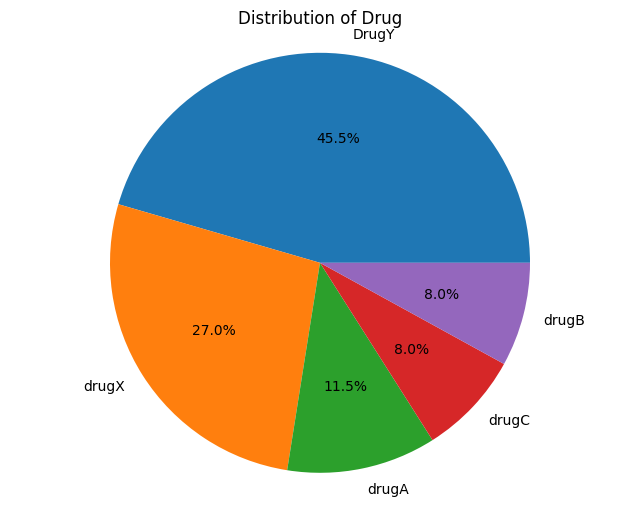

In [53]:
piePlot('Drug')

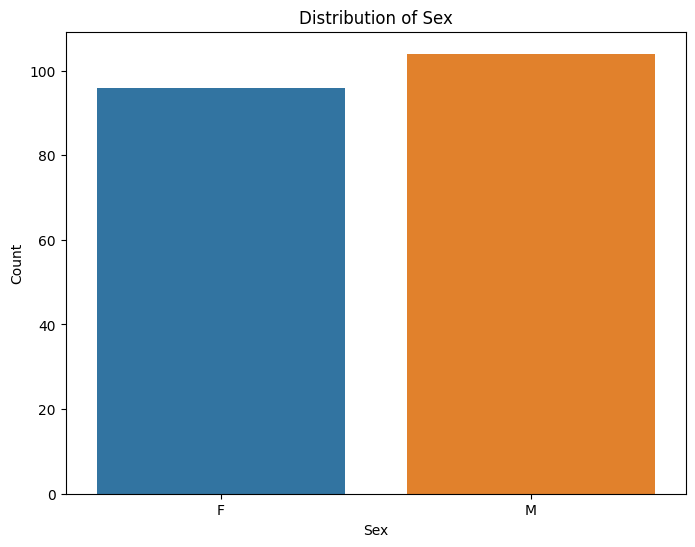

In [47]:
countPlot('Sex')

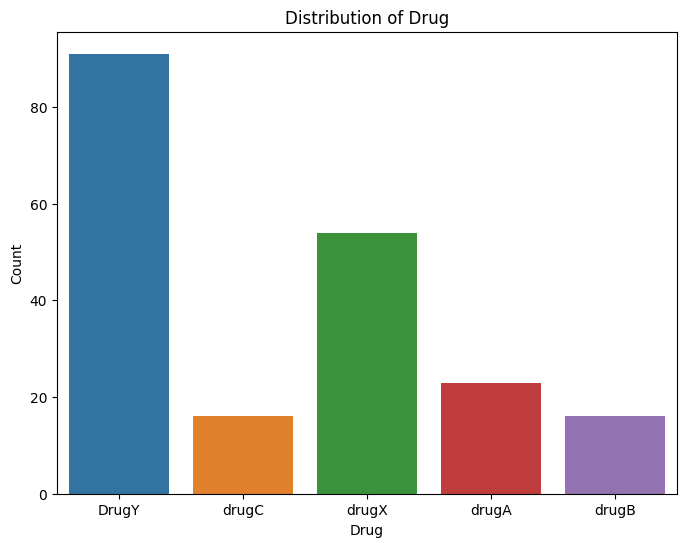

In [48]:
countPlot('Drug')


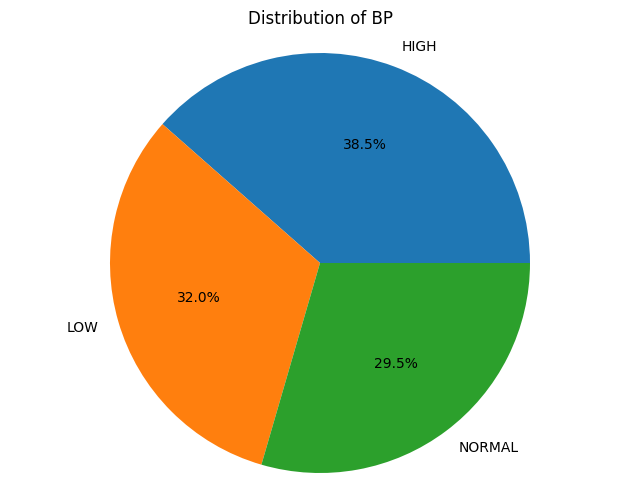

In [54]:
piePlot('BP')

# Data Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

def handleOrdinalEncoding(col, custom_categories):
    label_encoder = LabelEncoder()
    label_encoder.fit(custom_categories)
    encoded_data =label_encoder.fit_transform(df[col] )
    return encoded_data
    
def handleNominalEncoding(col):
    dummies = pd.get_dummies(df[col] , prefix=col + "_" )
    dummies_drop_one_col = dummies.columns.tolist()[0] 
    merged = pd.concat([df , dummies] , axis='columns')
    return merged.drop([col , dummies_drop_one_col] , axis = 'columns')

In [63]:
df = handleNominalEncoding("Sex")

In [55]:
for col,category in [ ["BP" , ['LOW' ,'NORMAL' , "HIGH" ]] , ["Cholesterol" , ['NORMAL' , "HIGH"]]  , [ 'Drug' , ['drugA' , 'drugB', 'drugC'  ,'drugX' , 'DrugY'] ]]:
   df[col] = handleOrdinalEncoding(col , category)

In [56]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,0,0,25.355,0
1,47,M,1,0,13.093,3
2,47,M,1,0,10.114,3
3,28,F,2,0,7.798,4
4,61,F,1,0,18.043,0


# Split data into training and testing sets

In [59]:
from sklearn.model_selection import  train_test_split


In [81]:
features = df.drop('Drug' , axis='columns')
target = df['Drug']

x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2, random_state=42)


In [67]:
x_train.head()

,Age,BP,Cholesterol,Na_to_K,Sex__M
79,32,1,1,10.840,False
197,52,2,0,9.894,True
38,39,2,1,9.709,False
24,33,1,0,33.486,False
122,34,2,0,22.456,True


# Classification with Decision Tree

In [68]:
from sklearn.tree import  DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt.score(x_test , y_test)

1.0

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


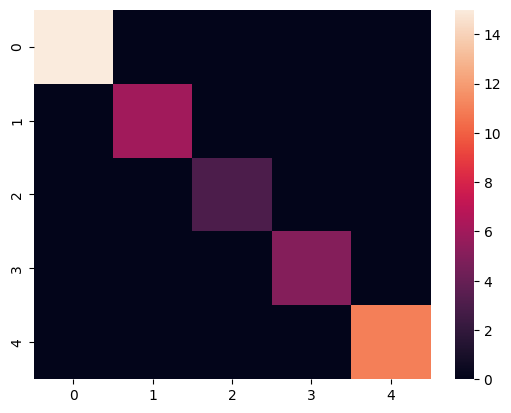

In [80]:
y_pred = dt.predict(x_test)
model_evaluation(y_pred , y_test)

# Classification with RandomForestClassifier

# Classification with Naive Bayes Classifier

# Classification with KNeighborsClassifier

# Classification with SVM Classifier

# Evaluate the Model

In [74]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [79]:
def model_evaluation(pred , actual):
    cm = confusion_matrix(actual , pred)
    print("Confusion Matrix:")
    print(cm)
    sns.heatmap(cm)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision Score:", precision)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall Score:", recall)
